## **Import required modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

## **Read Dataset**

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")

print("      Dataset overview :")
print(df.head())
print("\nGeneral Information:")
print(df.info())
print("\nNumber of rows and columns :", df.shape)

## **Checking for missing or duplicate values**

In [ ]:
print("\nmissing values :", df.isnull().sum().sum())
print("duplicate :", df.duplicated().sum())

## **Distribution of classes (positive / negative)**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

## **Text Cleaning Function**

In [10]:
def clean_text(text):
    text = text.lower()                                  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)                    # Remove HTML
    text = re.sub(r'http\S+|www\S+', '', text)           # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)                 # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()             # Remove multiple spaces
    return text

## **Apply the function to the 'review' column**

In [11]:
df['clean_review'] = df['review'].apply(clean_text)

print("\n Before/After Cleaning Example :")
for i in range(2):
    print("\n--- Original ---")
    print(df['review'][i])
    print("\n--- Cleaned ---")
    print(df['clean_review'][i])


 Before/After Cleaning Example :

--- Original ---
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I wou

## **Remove stopwords**

In [15]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['clean_review'].apply(remove_stopwords)

## **Review Length Analysis**

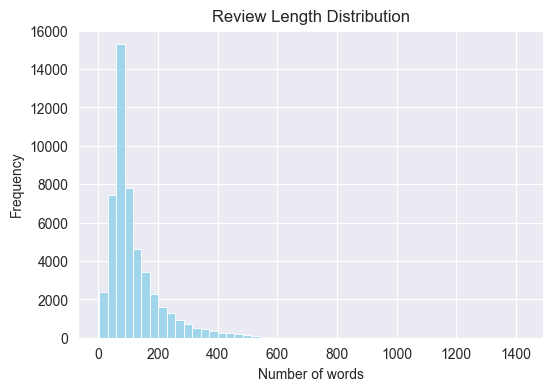


Average Review Length : 118


In [16]:
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 4))
sns.histplot(df['review_length'], bins=50, color='skyblue')
plt.title("Review Length Distribution")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

print("\nAverage Review Length :", int(df['review_length'].mean()))

## **Word Cloud Generation (Vocabulary Visualization)**

In [ ]:
positive_text = " ".join(df[df['sentiment']=='positive']['clean_review'])
negative_text = " ".join(df[df['sentiment']=='negative']['clean_review'])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("Frequent Words - Positive Reviews")
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Frequent Words - negative Reviews")
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()